In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
bread_basket_data = pd.read_csv('BreadBasket_DMS.csv')

bread_basket_data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [ ]:
bread_basket_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(21293, 4)

In [ ]:
bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].count()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [ ]:
bread_basket_data = bread_basket_data.drop(
    bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bread_basket_data.loc[bread_basket_data['Item'] == 'NONE'].count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [ ]:
bread_basket_data.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20507, 4)

In [ ]:
bread_basket_data['Item'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

In [ ]:
basket_items = {}

for item in bread_basket_data['Item']:
    if item in basket_items:
        basket_items[item] = basket_items[item] + 1
    else:
        basket_items[item] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Bread': 3325,
 'Scandinavian': 277,
 'Hot chocolate': 590,
 'Jam': 149,
 'Cookies': 540,
 'Muffin': 370,
 'Coffee': 5471,
 'Pastry': 856,
 'Medialuna': 616,
 'Tea': 1435,
 'Tartine': 47,
 'Basket': 6,
 'Mineral water': 136,
 'Farm House': 374,
 'Fudge': 159,
 'Juice': 369,
 "Ella's Kitchen Pouches": 17,
 'Victorian Sponge': 7,
 'Frittata': 81,
 'Hearty & Seasonal': 107,
 'Soup': 342,
 'Pick and Mix Bowls': 12,
 'Smoothies': 77,
 'Cake': 1025,
 'Mighty Protein': 11,
 'Chicken sand': 1,
 'Coke': 185,
 'My-5 Fruit Shoot': 18,
 'Focaccia': 54,
 'Sandwich': 771,
 'Alfajores': 369,
 'Eggs': 28,
 'Brownie': 379,
 'Dulce de Leche': 13,
 'Honey': 6,
 'The BART': 1,
 'Granola': 28,
 'Fairy Doors': 2,
 'Empanadas': 7,
 'Keeping It Local': 63,
 'Art Tray': 38,
 'Bowl Nic Pitt': 2,
 'Bread Pudding': 4,
 'Adjustment': 1,
 'Truffles': 193,
 'Chimichurri Oil': 2,
 'Bacon': 1,
 'Spread': 2,
 'Kids biscuit': 12,
 'Siblings': 2,
 'Caramel bites': 3,
 'Jammie Dodgers': 125,
 'Tiffin': 146,
 'Olum & pole

In [ ]:
item_names = []
item_frequencies = []

for key, val in basket_items.items():
    item_names.append(key)
    item_frequencies.append(val)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
items_table = pd.DataFrame({'Names': item_names,
                            'Frequencies': item_frequencies})

items_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Names,Frequencies
0,Bread,3325
1,Scandinavian,277
2,Hot chocolate,590
3,Jam,149
4,Cookies,540
...,...,...
89,Gift voucher,1
90,Cherry me Dried fruit,3
91,Mortimer,5
92,Raw bars,1


In [ ]:
items_table.sort_values('Frequencies', ascending=False).head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Names,Frequencies
6,Coffee,5471
0,Bread,3325
9,Tea,1435
23,Cake,1025
7,Pastry,856


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Names'>

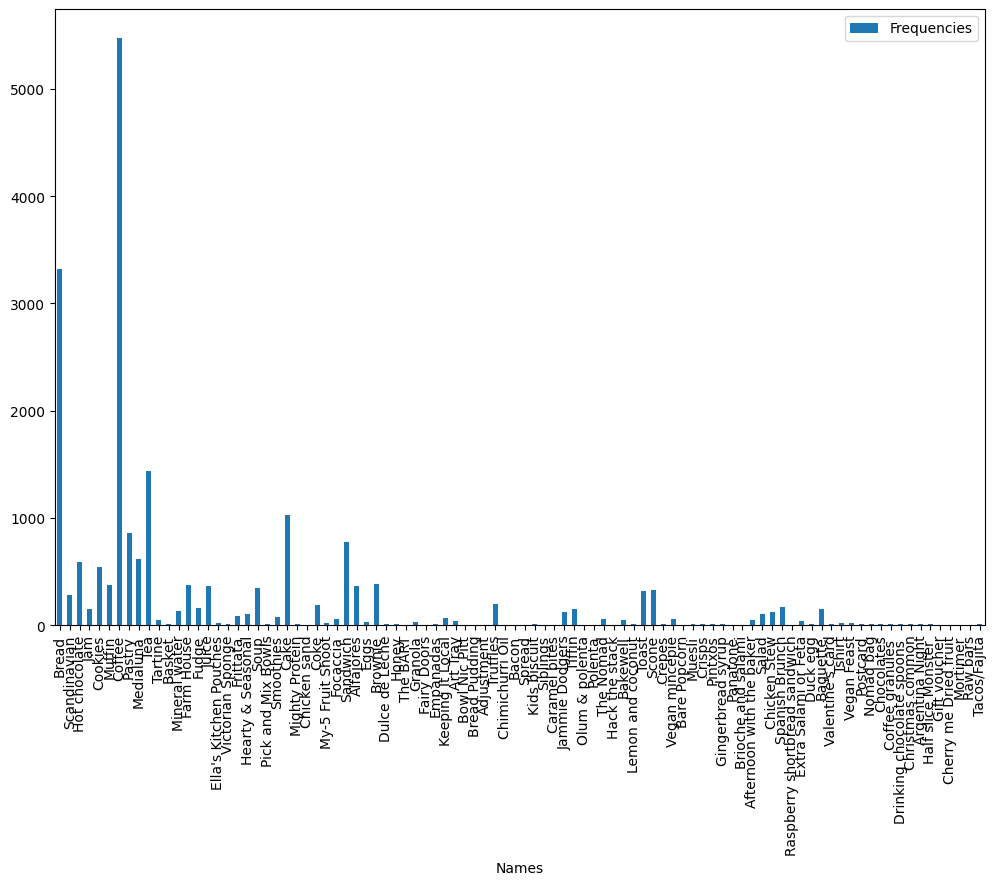

In [ ]:
items_table.plot.bar(y='Frequencies', x='Names', figsize=(12, 8))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Names'>

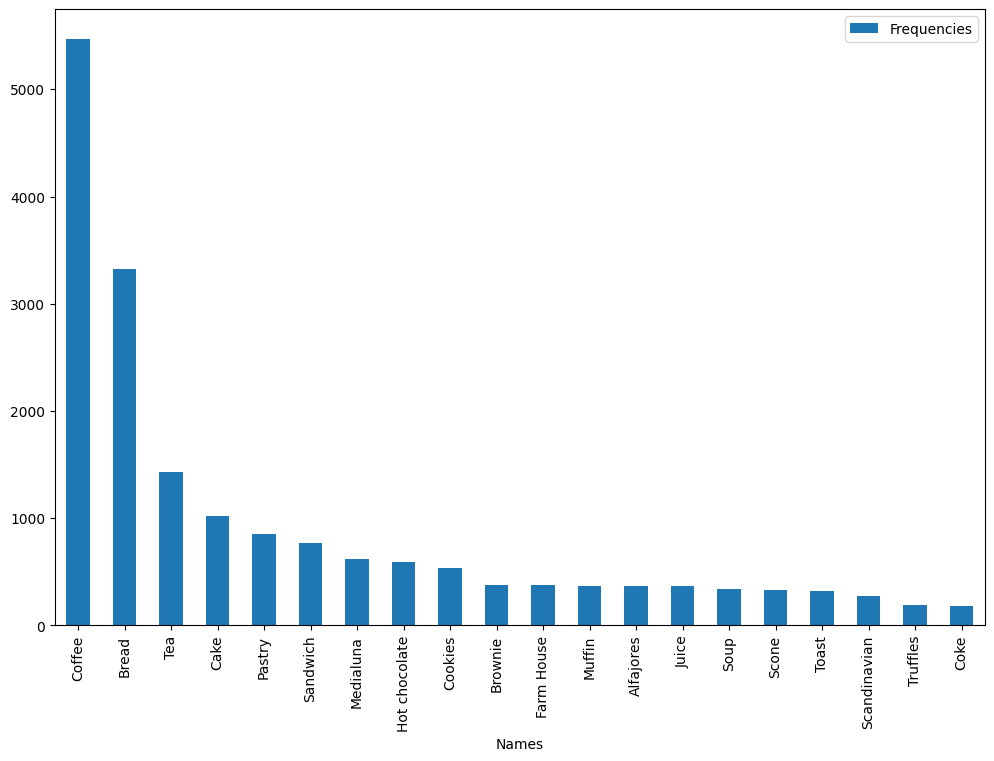

In [ ]:
items_table.sort_values('Frequencies', ascending=False).head(20).\
    plot.bar(y='Frequencies', x='Names', figsize=(12, 8))

In [ ]:
bread_basket_data['Transaction'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    20507.000000
mean      4976.202370
std       2796.203001
min          1.000000
25%       2552.000000
50%       5137.000000
75%       7357.000000
max       9684.000000
Name: Transaction, dtype: float64

In [ ]:
bread_basket_data = bread_basket_data.groupby('Transaction').agg(','.join).reset_index()

bread_basket_data = bread_basket_data.drop(['Date', 'Time'], axis=1)
bread_basket_data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item
0,1,Bread
1,2,"Scandinavian,Scandinavian"
2,3,"Hot chocolate,Jam,Cookies"
3,4,Muffin
4,5,"Coffee,Pastry,Bread"
5,6,"Medialuna,Pastry,Muffin"
6,7,"Medialuna,Pastry,Coffee,Tea"
7,8,"Pastry,Bread"
8,9,"Bread,Muffin"
9,10,"Scandinavian,Medialuna"


In [ ]:
bread_basket_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9465, 2)

In [ ]:
items_data = bread_basket_data['Item']

items_data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                          Bread
1      Scandinavian,Scandinavian
2      Hot chocolate,Jam,Cookies
3                         Muffin
4            Coffee,Pastry,Bread
5        Medialuna,Pastry,Muffin
6    Medialuna,Pastry,Coffee,Tea
7                   Pastry,Bread
8                   Bread,Muffin
9         Scandinavian,Medialuna
Name: Item, dtype: object

In [ ]:
items_list = [item.split(',') for item in items_data]

items_list_df = pd.DataFrame({'Items': items_list})

items_list_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Items
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
5,"[Medialuna, Pastry, Muffin]"
6,"[Medialuna, Pastry, Coffee, Tea]"
7,"[Pastry, Bread]"
8,"[Bread, Muffin]"
9,"[Scandinavian, Medialuna]"


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

transencoder = TransactionEncoder()

transencoder_array = transencoder.fit(items_list).transform(items_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
encoded_df = pd.DataFrame(transencoder_array, columns=transencoder.columns_)

encoded_df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
item_support_df = apriori(encoded_df, min_support=0.01, use_colnames=True)

item_support_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(61, 2)

In [ ]:
item_support_df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
34,0.090016,"(Coffee, Bread)"
59,0.011199,"(Pastry, Coffee, Bread)"
0,0.036344,(Alfajores)
3,0.040042,(Brownie)
33,0.023349,"(Cake, Bread)"
16,0.061807,(Medialuna)
46,0.029583,"(Coffee, Hot chocolate)"
28,0.033597,(Toast)
45,0.028209,"(Cookies, Coffee)"
55,0.049868,"(Coffee, Tea)"


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(item_support_df,
                          metric='confidence', min_threshold=0.1)

rules.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(44, 10)

In [ ]:
rules.sample(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,"(Cake, Coffee)",(Tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923,0.235157
11,(Tea),(Bread),0.142631,0.327205,0.028104,0.197037,0.602181,-0.018566,0.837890,-0.435198
16,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
0,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818,-0.133570
4,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
9,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
6,(Cookies),(Bread),0.054411,0.327205,0.014474,0.266019,0.813004,-0.003329,0.916638,-0.195651
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
13,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(Soup),(Coffee),0.034443,0.478394,0.015848,0.460123,0.961807,-0.000629,0.966156,-0.039502


In [ ]:
rules.sort_values('confidence', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
22,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
24,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
21,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
13,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
19,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


In [ ]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))

rules.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
30,(Tea),(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014,-0.300482,1
37,"(Pastry, Coffee)",(Bread),0.047544,0.327205,0.011199,0.235556,0.719901,-0.004357,0.880109,-0.290026,2
8,(Medialuna),(Bread),0.061807,0.327205,0.016904,0.273504,0.835879,-0.003319,0.926082,-0.173062,1
19,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700,1
18,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556,1


In [ ]:
rules[rules['antecedents'] == {'Juice'}]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
21,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.11675,0.002154,1.119919,0.108738,1


In [ ]:
rules[rules['antecedents'] == {'Cake'}]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
3,(Cake),(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923,-0.336947,1
13,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840,1
15,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553,1
17,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538,1


In [ ]:
rules[rules['antecedents'] == {'Sandwich'}]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
10,(Sandwich),(Bread),0.071844,0.327205,0.017010,0.236765,0.723596,-0.006498,0.881503,-0.291561,1
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205,1
32,(Sandwich),(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712,0.309050,1
